In [ ]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# Google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [ ]:
import zipfile
import os
import pandas as pd

In [ ]:
dir_data = '/content/drive/MyDrive/Colab Notebooks/LG Aimers/data/open.zip'

my_zip = zipfile.ZipFile(dir_data).extractall()  #압축 해제

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
train.head()

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN


In [ ]:
test.head()

,PRODUCT_ID,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TEST_000,2022-09-09 2:01,T100306,T_31,2.0,94.0,0.0,45.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TEST_001,2022-09-09 2:09,T100304,T_31,2.0,93.0,0.0,45.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TEST_002,2022-09-09 8:42,T100304,T_31,2.0,95.0,0.0,45.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TEST_003,2022-09-09 10:56,T010305,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TEST_004,2022-09-09 11:04,T010306,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

In [ ]:
train.describe()

,Y_Class,Y_Quality,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
count,598.000000,598.000000,349.000000,349.000000,349.0,349.0,349.000000,349.0,349.000000,349.000000,...,100.000000,100.00000,100.000000,100.000000,100.00000,99.0,0.0,0.0,0.0,0.0
mean,1.025084,0.530896,2.409742,95.123209,0.0,45.0,10.392550,0.0,48.802292,10.048711,...,50.807300,53.60770,49.606200,51.659800,66.64970,1.0,NaN,NaN,NaN,NaN
std,0.565069,0.007401,5.895256,4.107640,0.0,0.0,0.489019,0.0,4.373824,0.215571,...,7.011828,8.13899,7.158917,8.913065,4.52781,0.0,NaN,NaN,NaN,NaN
min,0.000000,0.500856,1.000000,87.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,32.120000,31.70000,32.560000,30.490000,61.67000,1.0,NaN,NaN,NaN,NaN
25%,1.000000,0.527535,2.000000,93.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,49.485000,52.20000,42.160000,49.915000,63.64500,1.0,NaN,NaN,NaN,NaN
50%,1.000000,0.530436,2.000000,95.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,53.425000,55.92500,51.460000,56.175000,65.14000,1.0,NaN,NaN,NaN,NaN
75%,1.000000,0.533433,2.000000,98.000000,0.0,45.0,11.000000,0.0,51.000000,10.000000,...,55.287500,58.97500,55.030000,57.175000,67.11500,1.0,NaN,NaN,NaN,NaN
max,2.000000,0.578841,103.000000,102.000000,0.0,45.0,11.000000,0.0,62.000000,11.000000,...,60.240000,68.66000,60.410000,59.930000,79.75000,1.0,NaN,NaN,NaN,NaN


In [ ]:
train.isnull().sum()

PRODUCT_ID      0
Y_Class         0
Y_Quality       0
TIMESTAMP       0
LINE            0
             ... 
X_2871        499
X_2872        598
X_2873        598
X_2874        598
X_2875        598
Length: 2881, dtype: int64

In [ ]:
train[['PRODUCT_ID','Y_Class','Y_Quality','TIMESTAMP','LINE','PRODUCT_CODE']].isnull().sum()

PRODUCT_ID      0
Y_Class         0
Y_Quality       0
TIMESTAMP       0
LINE            0
PRODUCT_CODE    0
dtype: int64

In [ ]:
train[['PRODUCT_ID','Y_Class','Y_Quality','TIMESTAMP','LINE','PRODUCT_CODE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRODUCT_ID    598 non-null    object 
 1   Y_Class       598 non-null    int64  
 2   Y_Quality     598 non-null    float64
 3   TIMESTAMP     598 non-null    object 
 4   LINE          598 non-null    object 
 5   PRODUCT_CODE  598 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 28.2+ KB


In [ ]:
train['TIMESTAMP'] = pd.to_datetime(train['TIMESTAMP'])
test['TIMESTAMP'] = pd.to_datetime(test['TIMESTAMP'])

In [ ]:
train[['PRODUCT_ID','Y_Class','Y_Quality','TIMESTAMP','LINE','PRODUCT_CODE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   PRODUCT_ID    598 non-null    object        
 1   Y_Class       598 non-null    int64         
 2   Y_Quality     598 non-null    float64       
 3   TIMESTAMP     598 non-null    datetime64[ns]
 4   LINE          598 non-null    object        
 5   PRODUCT_CODE  598 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 28.2+ KB


- TIMESTAMP -> 시간으로 형변환
- LINE, PRODUCT_CODE -> 범주형
- Y_Class -> 범주형
- Y_Quality ??

Y_Class : 제품 품질 상태(Target) 
0 : 적정 기준 미달 (부적합)
1 : 적합
2 : 적정 기준 초과 (부적합)
Y_Quality : 제품 품질 관련 정량적 수치
- 산점도나 상자그림

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

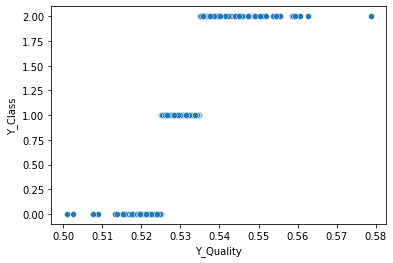

In [ ]:
sns.scatterplot(data=train, x='Y_Quality', y='Y_Class')

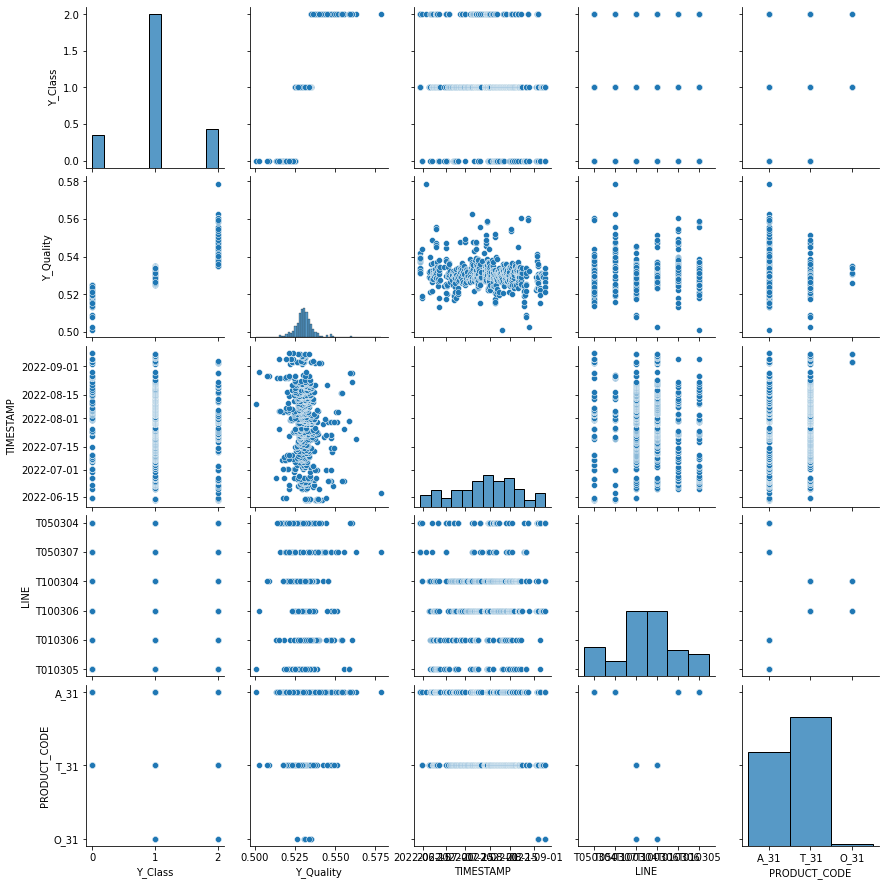

In [ ]:
sns.pairplot(train, vars=['Y_Class','Y_Quality','TIMESTAMP','LINE','PRODUCT_CODE'])
plt.show()

In [ ]:
df = train.drop(columns=['PRODUCT_ID','Y_Class', 'Y_Quality','TIMESTAMP','LINE','PRODUCT_CODE'])
df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 데이터 프레임에 추가
train['Year'] = train['TIMESTAMP'].dt.year
train['Month'] = train['TIMESTAMP'].dt.month
train['Day'] = train['TIMESTAMP'].dt.day

In [ ]:
test['Year'] = test['TIMESTAMP'].dt.year
test['Month'] = test['TIMESTAMP'].dt.month
test['Day'] = test['TIMESTAMP'].dt.day

'시'도 고려...?

In [ ]:
#train['Hour'] = train['TIMESTAMP'].dt.hour
#test['Hour'] = test['TIMESTAMP'].dt.hour

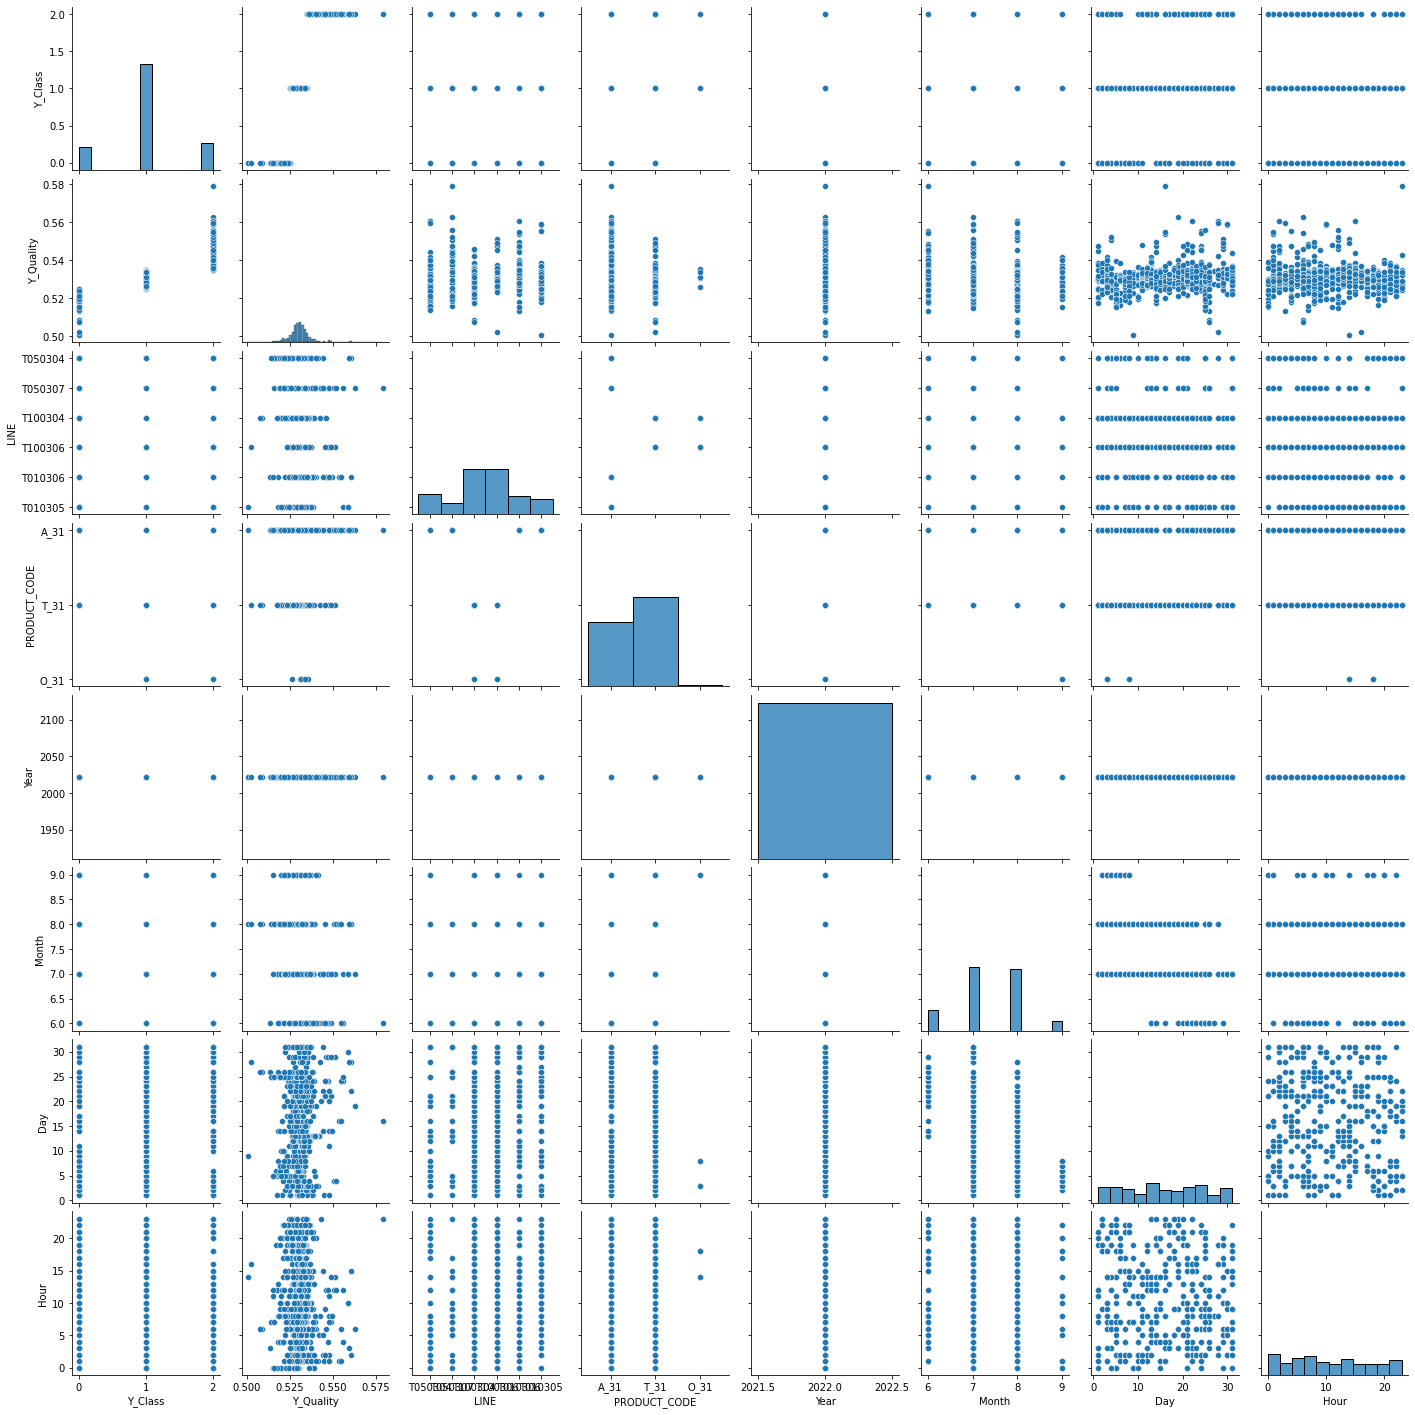

In [ ]:
sns.pairplot(train, vars=['Y_Class','Y_Quality','LINE','PRODUCT_CODE','Year','Month','Day','Hour'])
plt.show()

## 데이터 전처리

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_x = train.drop(columns=['PRODUCT_ID','Y_Class', 'Y_Quality','TIMESTAMP'])
train_y = train['Y_Class']

test_x = test.drop(columns=['PRODUCT_ID','TIMESTAMP'])

In [ ]:
train_indices = train_x.index
test_indices = test_x.index

In [ ]:
train_x = train_x.fillna(train_x.mean())
train_x = train_x.fillna(0)  #nan으로 남아있는 것들 0으로 결측 처리
test_x = test_x.fillna(test_x.mean())
test_x = test_x.fillna(0)

In [ ]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [ ]:
#!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.6 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb ## XGBoost 불러오기
from sklearn.svm import SVC  #서포트 벡터 머신 불러오기기
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#from catboost import CatBoostClassifier
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# 데이터 불러오기 및 전처리
# X: 입력 데이터, y: 출력 데이터
X, y = train_x, np.array(train_y).reshape(-1, 1)

In [ ]:
y.shape

(598, 1)

In [ ]:
X.shape

(598, 2880)

In [ ]:
test_x.shape

(310, 2880)

### 스케일링
- standardscaler
- minmaxscaler

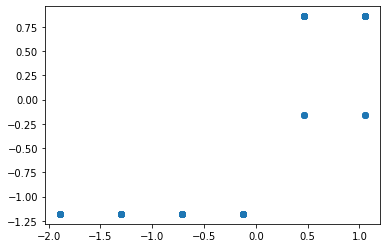

In [ ]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
X_train_scaled = scaler.transform(train_x)
X_test_scaled = scaler.transform(test_x)

plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1])'''

In [ ]:
#MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
X_train_scaled = scaler.transform(train_x)
X_test_scaled = scaler.transform(test_x)

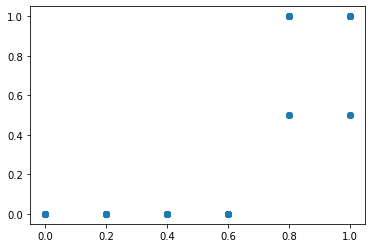

In [ ]:
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1])

In [ ]:
X_train_scaled

array([[0.4       , 0.        , 0.013821  , ..., 0.        , 0.        ,
        0.4       ],
       [0.6       , 0.        , 0.013821  , ..., 0.        , 0.        ,
        0.4       ],
       [0.4       , 0.        , 0.013821  , ..., 0.        , 0.        ,
        0.4       ],
       ...,
       [0.4       , 0.        , 0.013821  , ..., 0.        , 1.        ,
        0.23333333],
       [0.8       , 0.5       , 0.38235294, ..., 0.        , 1.        ,
        0.23333333],
       [1.        , 0.5       , 0.19607843, ..., 0.        , 1.        ,
        0.23333333]])

In [ ]:
from sklearn.utils.validation import _check_fit_params
from sklearn.base import is_classifier
from sklearn.utils.fixes import delayed
from joblib import Parallel
from sklearn.multioutput import _fit_estimator
from sklearn.multioutput import MultiOutputClassifier
import lightgbm

class MyMultiOutputClassifier_LGBM(MultiOutputClassifier):
    
    def fit(self, X, y, sample_weight=None, **fit_params):
        """ Fit the model to data.
        Fit a separate model for each output variable.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Data.
        y : {array-like, sparse matrix} of shape (n_samples, n_outputs)
            Multi-output targets. An indicator matrix turns on multilabel
            estimation.
        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights. If None, then samples are equally weighted.
            Only supported if the underlying regressor supports sample
            weights.
        **fit_params : dict of string -> object
            Parameters passed to the ``estimator.fit`` method of each step.
            .. versionadded:: 0.23
        Returns
        -------
        self : object
        """

        if not hasattr(self.estimator, "fit"):
            raise ValueError("The base estimator should implement"
                             " a fit method")

        X, y = self._validate_data(X, y,
                                   force_all_finite=False,
                                   multi_output=True, accept_sparse=True)
        '''
        if is_classifier(self):
            check_classification_targets(y)

        if y.ndim == 1:
            raise ValueError("y must have at least two dimensions for "
                             "multi-output regression but has only one.")

        if (sample_weight is not None and
                not has_fit_parameter(self.estimator, 'sample_weight')):
            raise ValueError("Underlying estimator does not support"
                             " sample weights.")'''
            
        lambda_y = lambda i: '0'+str(i+1) if i<9 else str(i+1)

        fit_params_validated = _check_fit_params(X, fit_params)
        [(X_test, Y_test)] = fit_params_validated.pop('eval_set')
        self.estimators_ = Parallel(n_jobs=self.n_jobs)(
            delayed(_fit_estimator)(
                self.estimator, X, y[:, i], sample_weight,
                **fit_params_validated, 
                eval_set=[(X_test, Y_test[:, i])], 
                eval_names="Y_" + lambda_y(i),
                verbose=-1, 
                callbacks=[lightgbm.early_stopping(200)])
            for i in range(y.shape[1]))
        return self
    
    # model save
    def save(self, path):
        for chain_idx, estimator in enumerate(self.estimators_):
            save_path = '{}_{}.txt'.format(path, chain_idx)
            estimator.booster_.save_model(save_path)
    
    # model load
    def load(self, path):
        for chain_idx, estimator in enumerate(self.estimators_):
            save_path = '{}_{}.txt'.format(path, chain_idx)
            self.estimators_[chain_idx] = lightgbm.Booster(save_path)

In [ ]:
from sklearn.utils.validation import _check_fit_params
from sklearn.base import is_classifier
from sklearn.utils.fixes import delayed
from joblib import Parallel
from sklearn.multioutput import _fit_estimator
from sklearn.multioutput import MultiOutputClassifier
import xgboost
import pickle

class MyMultiOutputClassifier_XGB(MultiOutputClassifier):
    
    def fit(self, X, y, sample_weight=None, **fit_params):
        """ Fit the model to data.
        Fit a separate model for each output variable.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Data.
        y : {array-like, sparse matrix} of shape (n_samples, n_outputs)
            Multi-output targets. An indicator matrix turns on multilabel
            estimation.
        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights. If None, then samples are equally weighted.
            Only supported if the underlying regressor supports sample
            weights.
        **fit_params : dict of string -> object
            Parameters passed to the ``estimator.fit`` method of each step.
            .. versionadded:: 0.23
        Returns
        -------
        self : object
        """

        if not hasattr(self.estimator, "fit"):
            raise ValueError("The base estimator should implement"
                             " a fit method")

        X, y = self._validate_data(X, y,
                                   force_all_finite=False,
                                   multi_output=True, accept_sparse=True)
        '''
        if is_classifier(self):
            check_classification_targets(y)

        if y.ndim == 1:
            raise ValueError("y must have at least two dimensions for "
                             "multi-output regression but has only one.")

        if (sample_weight is not None and
                not has_fit_parameter(self.estimator, 'sample_weight')):
            raise ValueError("Underlying estimator does not support"
                             " sample weights.")'''

        fit_params_validated = _check_fit_params(X, fit_params)
        [(X_test, Y_test)] = fit_params_validated.pop('eval_set')
        self.estimators_ = Parallel(n_jobs=self.n_jobs)(
            delayed(_fit_estimator)(
                self.estimator, X, y[:, i],
                eval_set=[(X_test, Y_test[:, i])],
                early_stopping_rounds=100, 
                #eval_metric = ["rmse"], 
                verbose=3000)
            
            for i in range(y.shape[1]))
        return self
    
    # model save
    def save(self, path):
        for chain_idx, estimator in enumerate(self.estimators_):
            save_path = '{}_{}.dat'.format(path, chain_idx)
            pickle.dump(estimator, open(save_path, "wb"))
    
    # model load
    def load(self, path):
        for chain_idx, estimator in enumerate(self.estimators_):
            save_path = '{}_{}.dat'.format(path, chain_idx)
            model = pickle.load(open(save_path, "rb"))


In [ ]:
final_pred = np.array(fold_target_pred[0])

for i in range(1, 6):
    final_pred += fold_target_pred[i]

final_pred = final_pred/6

## Catboost

In [ ]:
# k-fold 교차 검증을 위한 설정
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

scores = []
for train_index, val_index in kf.split(X_train_scaled):
    # 학습용 데이터셋과 검증용 데이터셋 나누기
    X_train, y_train = X_train_scaled[train_index], train_y[train_index]
    X_val, y_val = X_train_scaled[val_index], train_y[val_index]

    # XGBoost 모델 구성하기
    model = CatBoostClassifier(
        eval_metric = 'AUC',              # AUC로 성능 측정
        iterations = 2500,               # 반복횟수 최대 
        metric_period = 2500,            # 중간결과 출력X
        early_stopping_rounds = 100,     # 100iteration 동안 AUC 증가 없으면 학습 중단
        #ask_type = 'GPU',                # GPU 사용
        grow_policy = 'Depthwise',        # 트리 노드 생성 방식
                                          # 1) Depthwise(지정한 depth에 이를 때까지 level 순으로 노드 분할)
                                          # 2) Lossguide(loss 변화가 큰 순으로 노드 분할)
        depth = 10,                    # 트리 깊이
        learning_rate = 0.01,    # 러닝레이트
        l2_leaf_reg = 2,        # L2 정규화
        random_state=2023
        )

    # 모델 학습하기
    model.fit(X_train, y_train, eval_set=(X_val, y_val))

    # 검증용 데이터셋으로 성능 평가하기
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    scores.append(score)
    report = classification_report(y_val, y_pred)
    print(report)

# 모델 평가하기
mean_score = sum(scores) / n_splits
print("Mean accuracy score:", mean_score)

0:	test: 0.7058763	best: 0.7058763 (0)	total: 3.33s	remaining: 2h 18m 46s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8741468741
bestIteration = 53

Shrink model to first 54 iterations.
              precision    recall  f1-score   support

           0       0.67      0.17      0.27        12
           1       0.70      1.00      0.82        37
           2       1.00      0.36      0.53        11

    accuracy                           0.72        60
   macro avg       0.79      0.51      0.54        60
weighted avg       0.75      0.72      0.66        60



0:	test: 0.7254856	best: 0.7254856 (0)	total: 1.43s	remaining: 59m 31s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.802020202
bestIteration = 136

Shrink model to first 137 iterations.
              precision    recall  f1-score   support

           0       0.60      0.27      0.37        11
           1       0.72      0.97      0.83        39
           2       1.00      0.20      0.33        10

    accuracy                           0.72        60
   macro avg       0.77      0.48      0.51        60
weighted avg       0.74      0.72      0.66        60



0:	test: 0.6252924	best: 0.6252924 (0)	total: 1.23s	remaining: 51m 7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8089181287
bestIteration = 250

Shrink model to first 251 iterations.
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        12
           1       0.69      1.00      0.82        38
           2       1.00      0.40      0.57        10

    accuracy                           0.72        60
   macro avg       0.90      0.49      0.51        60
weighted avg       0.80      0.72      0.64        60



0:	test: 0.5602713	best: 0.5602713 (0)	total: 1.53s	remaining: 1h 3m 56s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7156976744
bestIteration = 9

Shrink model to first 10 iterations.
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.79      0.98      0.88        43
           2       1.00      0.25      0.40        12

    accuracy                           0.80        60
   macro avg       0.85      0.61      0.65        60
weighted avg       0.83      0.80      0.76        60



0:	test: 0.8575397	best: 0.8575397 (0)	total: 1.23s	remaining: 51m 22s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8653769841
bestIteration = 2

Shrink model to first 3 iterations.
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.85      0.93      0.89        42
           2       0.71      0.50      0.59        10

    accuracy                           0.82        60
   macro avg       0.76      0.68      0.71        60
weighted avg       0.81      0.82      0.81        60



0:	test: 0.6449864	best: 0.6449864 (0)	total: 1.34s	remaining: 55m 48s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8886178862
bestIteration = 1158

Shrink model to first 1159 iterations.
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.80      1.00      0.89        41
           2       0.67      0.22      0.33         9

    accuracy                           0.82        60
   macro avg       0.82      0.61      0.66        60
weighted avg       0.82      0.82      0.78        60



0:	test: 0.7036134	best: 0.7036134 (0)	total: 1.38s	remaining: 57m 38s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8317976513
bestIteration = 30

Shrink model to first 31 iterations.
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.73      1.00      0.85        41
           2       1.00      0.11      0.20         9

    accuracy                           0.75        60
   macro avg       0.91      0.47      0.50        60
weighted avg       0.82      0.75      0.68        60



0:	test: 0.8398050	best: 0.8398050 (0)	total: 848ms	remaining: 35m 19s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8732269504
bestIteration = 163

Shrink model to first 164 iterations.
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.85      0.96      0.90        47
           2       0.75      0.38      0.50         8

    accuracy                           0.83        60
   macro avg       0.76      0.58      0.63        60
weighted avg       0.82      0.83      0.81        60



0:	test: 0.6781715	best: 0.6781715 (0)	total: 2.88s	remaining: 1h 59m 46s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8671096346
bestIteration = 481

Shrink model to first 482 iterations.
              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.82      0.95      0.88        43
           2       0.80      0.44      0.57         9

    accuracy                           0.81        59
   macro avg       0.79      0.61      0.67        59
weighted avg       0.81      0.81      0.79        59



0:	test: 0.7755787	best: 0.7755787 (0)	total: 1.29s	remaining: 53m 55s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8328317901
bestIteration = 1

Shrink model to first 2 iterations.
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.69      0.94      0.80        36
           2       0.83      0.33      0.48        15

    accuracy                           0.69        59
   macro avg       0.68      0.51      0.54        59
weighted avg       0.70      0.69      0.65        59

Mean accuracy score: 0.7675141242937852


In [ ]:
y_pred[:10]

array([[2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1]])

In [ ]:
y_val[:10]

1     2
13    2
20    1
21    2
34    0
58    2
71    1
80    2
87    0
91    1
Name: Y_Class, dtype: int64

In [ ]:
# 정확도 불러오기
def get_clf_eval(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)

In [ ]:
get_clf_eval(y_val, y_pred)

0.6949152542372882


In [ ]:
from sklearn.model_selection import GridSearchCV
clf = CatBoostClassifier(border_count=None, random_state=2023, learning_rate=0.01, l2_leaf_reg=2)
params = {'iterations': [600, 700, 800, 900, 1000],
          'depth': [4, 5, 6],
          'loss_function': ['MultiClass'],
          'leaf_estimation_iterations': [10],
           'eval_metric': ['Accuracy'],
          'logging_level':['Silent'],
          'grow_policy': ['Depthwise','Lossguide']
         }

clf_grid = GridSearchCV(estimator=model, param_grid=params, cv=10, verbose = 10)
clf_grid.fit(X_train, y_train, eval_set=(X_val, y_val))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV 1/10; 1/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 1/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.444 total time=   1.5s
[CV 2/10; 1/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 1/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   1.9s
[CV 3/10; 1/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 1/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.741 total time=   2.0s
[CV 4/10; 1/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 1/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.630 total time=   3.0s
[CV 5/10; 1/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 1/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   2.0s
[CV 6/10; 1/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 1/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.611 total time=   1.6s
[CV 7/10; 1/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 1/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   1.4s
[CV 8/10; 1/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 1/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   1.5s
[CV 9/10; 1/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 1/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   1.4s
[CV 10/10; 1/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 1/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.660 total time=   1.4s
[CV 1/10; 2/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 2/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.444 total time=   2.6s
[CV 2/10; 2/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 2/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   4.1s
[CV 3/10; 2/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 2/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.741 total time=   1.4s
[CV 4/10; 2/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 2/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.630 total time=   1.5s
[CV 5/10; 2/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 2/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   1.6s
[CV 6/10; 2/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 2/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.611 total time=   1.6s
[CV 7/10; 2/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 2/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   1.4s
[CV 8/10; 2/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 2/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   1.5s
[CV 9/10; 2/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 2/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   1.7s
[CV 10/10; 2/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 2/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.660 total time=   2.6s
[CV 1/10; 3/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 3/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.444 total time=   2.9s
[CV 2/10; 3/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 3/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   2.1s
[CV 3/10; 3/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 3/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.741 total time=   1.5s
[CV 4/10; 3/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 3/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.630 total time=   1.6s
[CV 5/10; 3/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 3/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   2.4s
[CV 6/10; 3/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 3/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.611 total time=   1.6s
[CV 7/10; 3/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 3/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   2.6s
[CV 8/10; 3/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 3/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.7s
[CV 9/10; 3/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 3/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   1.4s
[CV 10/10; 3/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 3/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.660 total time=   1.4s
[CV 1/10; 4/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 4/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.444 total time=   1.4s
[CV 2/10; 4/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 4/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   1.8s
[CV 3/10; 4/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 4/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.741 total time=   1.5s
[CV 4/10; 4/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 4/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.630 total time=   1.6s
[CV 5/10; 4/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 4/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   2.3s
[CV 6/10; 4/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 4/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.611 total time=   3.1s
[CV 7/10; 4/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 4/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   1.5s
[CV 8/10; 4/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 4/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   1.5s
[CV 9/10; 4/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 4/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   1.4s
[CV 10/10; 4/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 4/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.660 total time=   1.4s
[CV 1/10; 5/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 5/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.444 total time=   1.5s
[CV 2/10; 5/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 5/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   1.9s
[CV 3/10; 5/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 5/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.741 total time=   1.7s
[CV 4/10; 5/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 5/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.630 total time=   3.0s
[CV 5/10; 5/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 5/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   2.3s
[CV 6/10; 5/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 5/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.611 total time=   1.7s
[CV 7/10; 5/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 5/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   1.4s
[CV 8/10; 5/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 5/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   1.5s
[CV 9/10; 5/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 5/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   1.4s
[CV 10/10; 5/30] START depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 5/30] END depth=4, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.660 total time=   1.4s
[CV 1/10; 6/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 6/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   1.7s
[CV 2/10; 6/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 6/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.4s
[CV 3/10; 6/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 6/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   3.3s
[CV 4/10; 6/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 6/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   1.7s
[CV 5/10; 6/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 6/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.741 total time=   1.5s
[CV 6/10; 6/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 6/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   1.4s
[CV 7/10; 6/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 6/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   2.4s
[CV 8/10; 6/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 6/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   1.5s
[CV 9/10; 6/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 6/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.0s
[CV 10/10; 6/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 6/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.623 total time=   2.9s
[CV 1/10; 7/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 7/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.3s
[CV 2/10; 7/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 7/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   1.4s
[CV 3/10; 7/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 7/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   2.0s
[CV 4/10; 7/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 7/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   1.7s
[CV 5/10; 7/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 7/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.741 total time=   1.5s
[CV 6/10; 7/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 7/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   3.1s
[CV 7/10; 7/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 7/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   9.9s
[CV 8/10; 7/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 7/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   3.9s
[CV 9/10; 7/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 7/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   4.7s
[CV 10/10; 7/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 7/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.623 total time=   3.4s
[CV 1/10; 8/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 8/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   1.7s
[CV 2/10; 8/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 8/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   1.4s
[CV 3/10; 8/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 8/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   1.9s
[CV 4/10; 8/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 8/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   1.6s
[CV 5/10; 8/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 8/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.741 total time=   1.5s
[CV 6/10; 8/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 8/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   2.3s
[CV 7/10; 8/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 8/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   5.5s
[CV 8/10; 8/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 8/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   2.8s
[CV 9/10; 8/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 8/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.5s
[CV 10/10; 8/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 8/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.623 total time=   3.2s
[CV 1/10; 9/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 9/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   3.9s
[CV 2/10; 9/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 9/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   1.7s
[CV 3/10; 9/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 9/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   1.9s
[CV 4/10; 9/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 9/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   1.7s
[CV 5/10; 9/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 9/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.741 total time=   1.5s
[CV 6/10; 9/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 9/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   1.4s
[CV 7/10; 9/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 9/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   2.4s
[CV 8/10; 9/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 9/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   2.7s
[CV 9/10; 9/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 9/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.8s
[CV 10/10; 9/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 9/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.623 total time=   1.6s
[CV 1/10; 10/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 10/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   1.7s
[CV 2/10; 10/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 10/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   1.4s
[CV 3/10; 10/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 10/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   1.9s
[CV 4/10; 10/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 10/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   1.7s
[CV 5/10; 10/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 10/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.741 total time=   1.4s
[CV 6/10; 10/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 10/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   2.7s
[CV 7/10; 10/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 10/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   3.5s
[CV 8/10; 10/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 10/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   1.5s
[CV 9/10; 10/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 10/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   1.6s
[CV 10/10; 10/30] START depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 10/30] END depth=4, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.623 total time=   1.5s
[CV 1/10; 11/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 11/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.519 total time=   3.7s
[CV 2/10; 11/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 11/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   3.0s
[CV 3/10; 11/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 11/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   3.8s
[CV 4/10; 11/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 11/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   2.0s
[CV 5/10; 11/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 11/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.648 total time=   2.4s
[CV 6/10; 11/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 11/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.556 total time=   2.7s
[CV 7/10; 11/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 11/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.2s
[CV 8/10; 11/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 11/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   5.3s
[CV 9/10; 11/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 11/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   1.9s
[CV 10/10; 11/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 11/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.623 total time=   2.8s
[CV 1/10; 12/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 12/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.519 total time=   5.5s
[CV 2/10; 12/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 12/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   3.6s
[CV 3/10; 12/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 12/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   2.8s
[CV 4/10; 12/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 12/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   2.0s
[CV 5/10; 12/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 12/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.648 total time=   2.4s
[CV 6/10; 12/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 12/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.556 total time=   2.6s
[CV 7/10; 12/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 12/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   3.0s
[CV 8/10; 12/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 12/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   4.4s
[CV 9/10; 12/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 12/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   1.9s
[CV 10/10; 12/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 12/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.623 total time=   2.2s
[CV 1/10; 13/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 13/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.519 total time=   3.7s
[CV 2/10; 13/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 13/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   3.1s
[CV 3/10; 13/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 13/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   3.6s
[CV 4/10; 13/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 13/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   2.0s
[CV 5/10; 13/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 13/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.648 total time=   2.4s
[CV 6/10; 13/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 13/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.556 total time=   2.7s
[CV 7/10; 13/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 13/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.3s
[CV 8/10; 13/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 13/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   5.2s
[CV 9/10; 13/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 13/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.0s
[CV 10/10; 13/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 13/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.623 total time=   2.2s
[CV 1/10; 14/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 14/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.519 total time=   3.7s
[CV 2/10; 14/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 14/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   2.4s
[CV 3/10; 14/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 14/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   4.3s
[CV 4/10; 14/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 14/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   1.9s
[CV 5/10; 14/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 14/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.648 total time=   2.4s
[CV 6/10; 14/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 14/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.556 total time=   2.7s
[CV 7/10; 14/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 14/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   1.9s
[CV 8/10; 14/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 14/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   6.6s
[CV 9/10; 14/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 14/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.0s
[CV 10/10; 14/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 14/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.623 total time=   2.3s
[CV 1/10; 15/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 15/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.519 total time=   3.7s
[CV 2/10; 15/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 15/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   2.4s
[CV 3/10; 15/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 15/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   4.3s
[CV 4/10; 15/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 15/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   2.0s
[CV 5/10; 15/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 15/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.648 total time=   2.4s
[CV 6/10; 15/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 15/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.556 total time=   2.7s
[CV 7/10; 15/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 15/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   1.9s
[CV 8/10; 15/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 15/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   5.4s
[CV 9/10; 15/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 15/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.0s
[CV 10/10; 15/30] START depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 15/30] END depth=5, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.623 total time=   2.3s
[CV 1/10; 16/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 16/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.574 total time=   3.7s
[CV 2/10; 16/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 16/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   2.8s
[CV 3/10; 16/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 16/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   4.6s
[CV 4/10; 16/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 16/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   2.8s
[CV 5/10; 16/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 16/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   2.5s
[CV 6/10; 16/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 16/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.574 total time=   2.7s
[CV 7/10; 16/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 16/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   2.6s
[CV 8/10; 16/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 16/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   3.6s
[CV 9/10; 16/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 16/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.5s
[CV 10/10; 16/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 16/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.660 total time=   2.6s
[CV 1/10; 17/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 17/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.574 total time=   3.8s
[CV 2/10; 17/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 17/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   3.5s
[CV 3/10; 17/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 17/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   4.0s
[CV 4/10; 17/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 17/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   2.8s
[CV 5/10; 17/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 17/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   2.6s
[CV 6/10; 17/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 17/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.574 total time=   2.7s
[CV 7/10; 17/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 17/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   3.1s
[CV 8/10; 17/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 17/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   3.1s
[CV 9/10; 17/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 17/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.4s
[CV 10/10; 17/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 17/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.660 total time=   2.7s
[CV 1/10; 18/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 18/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.574 total time=   3.8s
[CV 2/10; 18/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 18/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   3.9s
[CV 3/10; 18/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 18/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   3.5s
[CV 4/10; 18/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 18/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   2.8s
[CV 5/10; 18/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 18/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   2.6s
[CV 6/10; 18/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 18/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.574 total time=   2.7s
[CV 7/10; 18/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 18/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   3.7s
[CV 8/10; 18/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 18/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   2.6s
[CV 9/10; 18/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 18/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.5s
[CV 10/10; 18/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 18/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.660 total time=   2.6s
[CV 1/10; 19/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 19/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.574 total time=   3.7s
[CV 2/10; 19/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 19/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   4.3s
[CV 3/10; 19/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 19/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   3.1s
[CV 4/10; 19/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 19/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   2.8s
[CV 5/10; 19/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 19/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   2.6s
[CV 6/10; 19/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 19/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.574 total time=   3.2s
[CV 7/10; 19/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 19/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   3.7s
[CV 8/10; 19/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 19/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   2.1s
[CV 9/10; 19/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 19/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.5s
[CV 10/10; 19/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 19/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.660 total time=   2.7s
[CV 1/10; 20/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 20/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.574 total time=   4.2s
[CV 2/10; 20/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 20/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   4.3s
[CV 3/10; 20/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 20/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   2.7s
[CV 4/10; 20/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 20/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   2.8s
[CV 5/10; 20/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 20/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   2.6s
[CV 6/10; 20/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 20/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.574 total time=   3.8s
[CV 7/10; 20/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 20/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   3.3s
[CV 8/10; 20/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 20/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   1.9s
[CV 9/10; 20/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 20/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.5s
[CV 10/10; 20/30] START depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 20/30] END depth=5, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.660 total time=   2.6s
[CV 1/10; 21/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 21/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.630 total time=   2.5s
[CV 2/10; 21/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 21/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   4.7s
[CV 3/10; 21/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 21/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   3.4s
[CV 4/10; 21/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 21/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.8s
[CV 5/10; 21/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 21/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   4.2s
[CV 6/10; 21/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 21/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   5.9s
[CV 7/10; 21/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 21/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.4s
[CV 8/10; 21/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 21/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   2.8s
[CV 9/10; 21/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 21/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.6s
[CV 10/10; 21/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 21/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.642 total time=   5.4s
[CV 1/10; 22/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 22/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.630 total time=   2.9s
[CV 2/10; 22/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 22/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   2.4s
[CV 3/10; 22/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 22/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   3.1s
[CV 4/10; 22/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 22/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   3.3s
[CV 5/10; 22/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 22/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   6.0s
[CV 6/10; 22/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 22/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   3.6s
[CV 7/10; 22/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 22/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.5s
[CV 8/10; 22/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 22/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   3.6s
[CV 9/10; 22/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 22/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   4.1s
[CV 10/10; 22/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 22/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.642 total time=   3.4s
[CV 1/10; 23/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 23/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.630 total time=   2.5s
[CV 2/10; 23/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 23/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   2.4s
[CV 3/10; 23/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 23/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   5.4s
[CV 4/10; 23/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 23/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.8s
[CV 5/10; 23/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 23/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   4.2s
[CV 6/10; 23/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 23/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   4.0s
[CV 7/10; 23/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 23/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   4.4s
[CV 8/10; 23/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 23/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   2.8s
[CV 9/10; 23/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 23/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.6s
[CV 10/10; 23/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 23/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.642 total time=   3.4s
[CV 1/10; 24/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 24/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.630 total time=   3.8s
[CV 2/10; 24/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 24/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   3.5s
[CV 3/10; 24/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 24/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   3.2s
[CV 4/10; 24/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 24/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.8s
[CV 5/10; 24/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 24/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   5.4s
[CV 6/10; 24/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 24/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   4.7s
[CV 7/10; 24/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 24/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.4s
[CV 8/10; 24/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 24/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   2.8s
[CV 9/10; 24/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 24/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.8s
[CV 10/10; 24/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 24/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.642 total time=   5.5s
[CV 1/10; 25/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 25/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.630 total time=   2.5s
[CV 2/10; 25/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 25/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   2.4s
[CV 3/10; 25/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 25/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.759 total time=   3.1s
[CV 4/10; 25/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 25/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   4.5s
[CV 5/10; 25/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 25/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.722 total time=   4.8s
[CV 6/10; 25/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 25/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   3.6s
[CV 7/10; 25/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 25/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.5s
[CV 8/10; 25/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 25/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   4.7s
[CV 9/10; 25/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 25/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   3.0s
[CV 10/10; 25/30] START depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 25/30] END depth=6, eval_metric=Accuracy, grow_policy=Depthwise, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.642 total time=   3.4s
[CV 1/10; 26/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 26/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   3.1s
[CV 2/10; 26/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 26/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   8.0s
[CV 3/10; 26/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 26/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   2.8s
[CV 4/10; 26/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 26/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.648 total time=   5.2s
[CV 5/10; 26/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 26/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.796 total time=   6.3s
[CV 6/10; 26/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 26/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.611 total time=   3.5s
[CV 7/10; 26/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 26/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.9s
[CV 8/10; 26/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 26/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.630 total time=   3.3s
[CV 9/10; 26/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 26/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   4.6s
[CV 10/10; 26/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 26/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=600, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.642 total time=   3.7s
[CV 1/10; 27/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 27/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   3.1s
[CV 2/10; 27/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 27/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   8.0s
[CV 3/10; 27/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 27/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   2.8s
[CV 4/10; 27/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 27/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.648 total time=   5.2s
[CV 5/10; 27/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 27/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.796 total time=   6.1s
[CV 6/10; 27/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 27/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.611 total time=   3.6s
[CV 7/10; 27/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 27/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.9s
[CV 8/10; 27/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 27/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.630 total time=   2.9s
[CV 9/10; 27/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 27/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   3.9s
[CV 10/10; 27/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 27/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=700, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.642 total time=   4.7s
[CV 1/10; 28/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 28/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   3.1s
[CV 2/10; 28/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 28/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   6.9s
[CV 3/10; 28/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 28/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   3.9s
[CV 4/10; 28/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 28/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.648 total time=   5.2s
[CV 5/10; 28/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 28/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.796 total time=   4.5s
[CV 6/10; 28/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 28/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.611 total time=   5.3s
[CV 7/10; 28/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 28/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   3.0s
[CV 8/10; 28/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 28/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.630 total time=   2.8s
[CV 9/10; 28/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 28/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.6s
[CV 10/10; 28/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 28/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=800, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.642 total time=   6.0s
[CV 1/10; 29/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 29/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   3.1s
[CV 2/10; 29/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 29/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   5.7s
[CV 3/10; 29/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 29/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   5.2s
[CV 4/10; 29/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 29/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.648 total time=   5.2s
[CV 5/10; 29/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 29/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.796 total time=   4.0s
[CV 6/10; 29/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 29/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.611 total time=   5.8s
[CV 7/10; 29/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 29/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.9s
[CV 8/10; 29/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 29/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.630 total time=   2.8s
[CV 9/10; 29/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 29/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.6s
[CV 10/10; 29/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 29/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=900, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.642 total time=   5.7s
[CV 1/10; 30/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 1/10; 30/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.593 total time=   3.4s
[CV 2/10; 30/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 2/10; 30/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.704 total time=   5.7s
[CV 3/10; 30/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 3/10; 30/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.667 total time=   3.9s
[CV 4/10; 30/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 4/10; 30/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.648 total time=   6.5s
[CV 5/10; 30/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 5/10; 30/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.796 total time=   4.0s
[CV 6/10; 30/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 6/10; 30/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.611 total time=   4.6s
[CV 7/10; 30/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 7/10; 30/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   4.2s
[CV 8/10; 30/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 8/10; 30/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.630 total time=   2.9s
[CV 9/10; 30/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 9/10; 30/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.685 total time=   2.6s
[CV 10/10; 30/30] START depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass


[CV 10/10; 30/30] END depth=6, eval_metric=Accuracy, grow_policy=Lossguide, iterations=1000, leaf_estimation_iterations=10, logging_level=Silent, loss_function=MultiClass;, score=0.642 total time=   4.2s


GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fc29869d130>,
             param_grid={'depth': [4, 5, 6], 'eval_metric': ['Accuracy'],
                         'grow_policy': ['Depthwise', 'Lossguide'],
                         'iterations': [600, 700, 800, 900, 1000],
                         'leaf_estimation_iterations': [10],
                         'logging_level': ['Silent'],
                         'loss_function': ['MultiClass']},
             verbose=10)

In [ ]:
scores_df = pd.DataFrame(clf_grid.cv_results_)
print(scores_df)
print(f"최적의 파라미터: {clf_grid.best_params_}")
print(f"최고 정확도: {clf_grid.best_score_}")

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_depth  \
0        1.728339      0.462171         0.047921        0.017511           4   
1        1.903572      0.775510         0.108733        0.161558           4   
2        1.963729      0.547152         0.048724        0.021235           4   
3        1.710413      0.515577         0.048394        0.018859           4   
4        1.711606      0.479894         0.051224        0.017726           4   
5        2.021954      0.615302         0.052879        0.020321           4   
6        3.257945      2.346493         0.121058        0.129748           4   
7        2.373598      1.146734         0.062726        0.031197           4   
8        2.097480      0.734841         0.052182        0.018303           4   
9        1.850817      0.652596         0.044313        0.014252           4   
10       2.915751      0.989071         0.062318        0.033106           5   
11       2.977411      1.021379         

#inference

In [ ]:
pred = model.predict(X_test_scaled)
pred[:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [ ]:
pred.shape

(310, 1)

In [ ]:
pred.reshape(-1)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Submit

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
submit['Y_Class'] = pred

In [ ]:
submit.to_csv('./kfold_0219_standard_cat_2.csv', index=False)

# TabNet

In [ ]:
'''
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

clf = TabNetClassifier()  #TabNetRegressor()
clf.fit(
  X_train, Y_train,
  eval_set=[(X_valid, y_valid)]
)
preds = clf.predict(X_test)
'''

In [ ]:
!pip install pytorch-tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 4.4 MB/s eta 0:00:00


In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

In [ ]:
# k-fold 교차 검증을 위한 설정
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# k-fold 교차 검증 수행
scores = []
for train_index, val_index in kf.split(X_train_scaled):
    # 학습용 데이터셋과 검증용 데이터셋 나누기
    X_train, y_train = X_train_scaled[train_index], train_y[train_index]
    X_val, y_val = X_train_scaled[val_index], train_y[val_index]

    # XGBoost 모델 구성하기
    model = TabNetClassifier(verbose=1,seed=42,
                             #optimizer_fn='Adam', # Any optimizer works here
                             #mask_type='entmax', #sparsemax
                             )

    # 모델 학습하기
    model.fit(X_train, y_train,
              #eval_set=(X_val.values, y_val.values),
              patience=20, max_epochs=200,
              batch_size=1024, virtual_batch_size=128,
              num_workers=1, weights=1, drop_last=False,
              )

    # 검증용 데이터셋으로 성능 평가하기
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    scores.append(score)
    report = classification_report(y_val.values, y_pred)
    print(report)

# 모델 평가하기
mean_score = sum(scores) / n_splits
print("Mean accuracy score:", mean_score)

epoch 0  | loss: 1.45533 |  0:00:01s
epoch 1  | loss: 1.37927 |  0:00:02s
epoch 2  | loss: 1.21134 |  0:00:03s
epoch 3  | loss: 1.1822  |  0:00:04s
epoch 4  | loss: 1.17047 |  0:00:05s
epoch 5  | loss: 1.13899 |  0:00:06s
epoch 6  | loss: 1.08932 |  0:00:07s
epoch 7  | loss: 1.10882 |  0:00:08s
epoch 8  | loss: 1.12072 |  0:00:09s
epoch 9  | loss: 1.12091 |  0:00:10s
epoch 10 | loss: 1.13149 |  0:00:11s
epoch 11 | loss: 1.11421 |  0:00:12s
epoch 12 | loss: 1.14057 |  0:00:13s
epoch 13 | loss: 1.13229 |  0:00:14s
epoch 14 | loss: 1.11746 |  0:00:15s
epoch 15 | loss: 1.10896 |  0:00:16s
epoch 16 | loss: 1.1051  |  0:00:17s
epoch 17 | loss: 1.09303 |  0:00:18s
epoch 18 | loss: 1.08953 |  0:00:20s
epoch 19 | loss: 1.08598 |  0:00:21s
epoch 20 | loss: 1.06558 |  0:00:22s
epoch 21 | loss: 1.07204 |  0:00:23s
epoch 22 | loss: 1.07707 |  0:00:24s
epoch 23 | loss: 1.06273 |  0:00:25s
epoch 24 | loss: 1.04949 |  0:00:26s
epoch 25 | loss: 1.03437 |  0:00:27s
epoch 26 | loss: 1.05897 |  0:00:28s
e

In [ ]:
# Stratified k-fold 교차 검증을 위한 설정
from sklearn.model_selection import StratifiedKFold

n_splits = 5
skf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# k-fold 교차 검증 수행
scores = []
for train_index, val_index in skf.split(X_train_scaled, train_y):
    # 학습용 데이터셋과 검증용 데이터셋 나누기
    X_train, y_train = X_train_scaled[train_index], train_y[train_index]
    X_val, y_val = X_train_scaled[val_index], train_y[val_index]

    # XGBoost 모델 구성하기
    skf_model = TabNetClassifier(verbose=1,seed=42,
                             #optimizer_fn='Adam', # Any optimizer works here
                             #mask_type='entmax', #sparsemax
                             )

    # 모델 학습하기
    skf_model.fit(X_train, y_train,
              #eval_set=(X_val.values, y_val.values),
              patience=20, max_epochs=200,
              batch_size=1024, virtual_batch_size=128,
              num_workers=1, weights=1, drop_last=False,
              )

    # 검증용 데이터셋으로 성능 평가하기
    y_pred = skf_model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    scores.append(score)
    report = classification_report(y_val.values, y_pred)
    print(report)

# 모델 평가하기
mean_score = sum(scores) / n_splits
print("Mean accuracy score:", mean_score)

epoch 0  | loss: 1.37394 |  0:00:01s
epoch 1  | loss: 1.30047 |  0:00:02s
epoch 2  | loss: 1.29885 |  0:00:04s
epoch 3  | loss: 1.27294 |  0:00:05s
epoch 4  | loss: 1.22387 |  0:00:06s
epoch 5  | loss: 1.25345 |  0:00:07s
epoch 6  | loss: 1.13294 |  0:00:08s
epoch 7  | loss: 1.14138 |  0:00:09s
epoch 8  | loss: 1.20988 |  0:00:10s
epoch 9  | loss: 1.21343 |  0:00:11s
epoch 10 | loss: 1.19643 |  0:00:12s
epoch 11 | loss: 1.09735 |  0:00:13s
epoch 12 | loss: 1.12192 |  0:00:15s
epoch 13 | loss: 1.10854 |  0:00:16s
epoch 14 | loss: 1.14369 |  0:00:17s
epoch 15 | loss: 1.10795 |  0:00:19s
epoch 16 | loss: 1.0924  |  0:00:20s
epoch 17 | loss: 1.09628 |  0:00:21s
epoch 18 | loss: 1.07232 |  0:00:22s
epoch 19 | loss: 1.11421 |  0:00:23s
epoch 20 | loss: 1.06464 |  0:00:24s
epoch 21 | loss: 1.07739 |  0:00:25s
epoch 22 | loss: 1.05923 |  0:00:26s
epoch 23 | loss: 1.07044 |  0:00:27s
epoch 24 | loss: 1.05705 |  0:00:28s
epoch 25 | loss: 1.05158 |  0:00:29s
epoch 26 | loss: 1.06599 |  0:00:30s
e

In [ ]:
'''
# k-fold 교차 검증을 위한 설정
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# k-fold 교차 검증 수행
scores = []
for train_index, val_index in kf.split(train_x):
    # 학습용 데이터셋과 검증용 데이터셋 나누기
    X_train, y_train = train_x.iloc[train_index], train_y.iloc[train_index]
    X_val, y_val = train_x.iloc[val_index], train_y.iloc[val_index]

    # XGBoost 모델 구성하기
    model = TabNetClassifier(verbose=1,seed=42,
                             #optimizer_fn='Adam', # Any optimizer works here
                             #mask_type='entmax', #sparsemax
                             )

    # 모델 학습하기
    model.fit(X_train.values, y_train.values,
              #eval_set=(X_val.values, y_val.values),
              patience=20, max_epochs=200,
              batch_size=1024, virtual_batch_size=128,
              num_workers=1, weights=1, drop_last=False,
              )

    # 검증용 데이터셋으로 성능 평가하기
    y_pred = model.predict(X_val.values)
    score = f1_score(y_val.values, y_pred, average='macro')
    scores.append(score)
    report = classification_report(y_val.values, y_pred)
    print(report)

# 모델 평가하기
mean_score = sum(scores) / n_splits
print("Mean accuracy score:", mean_score)'''

In [ ]:
y_pred[:10]

array([2, 2, 1, 1, 1, 1, 2, 1, 0, 2])

In [ ]:
y_val[:10]

1     2
13    2
14    1
20    1
21    2
27    2
32    2
34    0
40    1
47    1
Name: Y_Class, dtype: int64

In [ ]:
# 정확도 불러오기
def get_clf_eval(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)

In [ ]:
get_clf_eval(y_val, y_pred)

0.7226890756302521


In [ ]:
get_clf_eval(y_val, y_pred) #skf

0.5798319327731093


##inference

In [ ]:
X_test_scaled.shape

(310, 2881)

In [ ]:
X_test_scaled

array([[ 1.04923134,  0.85784283, -0.0911106 , ...,  2.02758751,
        -0.76056931, -1.31612395],
       [ 0.46174038,  0.85784283, -0.0911106 , ...,  2.02758751,
        -0.76056931, -1.31612395],
       [ 0.46174038,  0.85784283, -0.0911106 , ...,  2.02758751,
        -0.76056931, -0.40729933],
       ...,
       [ 1.04923134,  0.85784283, -0.0911106 , ...,  4.54837198,
        -1.21561729,  0.80446683],
       [ 1.04923134,  0.85784283, -0.0911106 , ...,  4.54837198,
        -1.21561729,  1.41034991],
       [ 1.04923134,  0.85784283, -0.0911106 , ...,  4.54837198,
        -1.21561729,  1.56182068]])

In [ ]:
model

TabNetClassifier(n_d=8, n_a=8, n_steps=3, gamma=1.3, cat_idxs=[], cat_dims=[], cat_emb_dim=1, n_independent=2, n_shared=2, epsilon=1e-15, momentum=0.02, lambda_sparse=0.001, seed=42, clip_value=1, verbose=1, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.02}, scheduler_fn=None, scheduler_params={}, mask_type='sparsemax', input_dim=2881, output_dim=3, device_name='auto', n_shared_decoder=1, n_indep_decoder=1)

In [ ]:
pred = model.predict(X_test_scaled)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
pred_skf = skf_model.predict(X_test_scaled)
pred_skf

array([1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Submit

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
submit['Y_Class'] = pred

In [ ]:
submit.to_csv('/content/drive/MyDrive/Colab Notebooks/LG Aimers/kfold_0222_TabNet_3.csv', index=False)

In [ ]:
submit.to_csv('./kfold_0222_TabNet_3.csv', index=False)

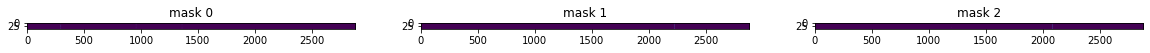

In [ ]:
explain_matrix, masks = model.explain(X_test_scaled)

fig, axs = plt.subplots(1, 3, figsize=(20,20))
for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

In [ ]:
# global
feat_importances = pd.Series(model.feature_importances_, index=features)
feat_importances.plot(kind='barh')

#local
explain_matrix, masks = clf.explain(X_test_scaled)
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][30:50])
    axs[i].set_title(f"mask {i}")

#지금까지 최고성능

In [ ]:
# k-fold 교차 검증을 위한 설정
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# k-fold 교차 검증 수행
scores = []
for train_index, val_index in kf.split(train_x):
    # 학습용 데이터셋과 검증용 데이터셋 나누기
    X_train, y_train = train_x.iloc[train_index], train_y.iloc[train_index]
    X_val, y_val = train_x.iloc[val_index], train_y.iloc[val_index]

    # XGBoost 모델 구성하기
    model = xgb.XGBoostClassifier(
        max_depth=3,
        learning_rate=0.1,
        n_estimators=200,
        objective='multi:softmax',
        num_class=len(set(y_train)),
        random_state=2023
    )

    # 모델 학습하기
    model.fit(X_train, y_train)

    # 검증용 데이터셋으로 성능 평가하기
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    scores.append(score)
    report = classification_report(y_val, y_pred)
    print(report)

# 모델 평가하기
mean_score = sum(scores) / n_splits
print("Mean accuracy score:", mean_score)


              precision    recall  f1-score   support

           0       0.88      0.30      0.45        23
           1       0.70      0.93      0.80        76
           2       0.64      0.33      0.44        21

    accuracy                           0.71       120
   macro avg       0.74      0.52      0.56       120
weighted avg       0.72      0.71      0.67       120

              precision    recall  f1-score   support

           0       0.71      0.29      0.42        17
           1       0.76      0.98      0.85        81
           2       0.89      0.36      0.52        22

    accuracy                           0.77       120
   macro avg       0.79      0.54      0.60       120
weighted avg       0.78      0.77      0.73       120

              precision    recall  f1-score   support

           0       0.82      0.50      0.62        18
           1       0.81      0.95      0.87        83
           2       0.55      0.32      0.40        19

    accuracy        

In [ ]:
y_pred[:10]

array([2, 2, 1, 1, 1, 2, 2, 1, 1, 2])

In [ ]:
y_val[:10]

1     2
13    2
14    1
20    1
21    2
27    2
32    2
34    0
40    1
47    1
Name: Y_Class, dtype: int64

In [ ]:
# 정확도 불러오기
def get_clf_eval(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)

In [ ]:
get_clf_eval(y_val, y_pred)

0.7899159663865546


##inference

In [ ]:
pred = model.predict(test_x)
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,

## Submit

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
submit['Y_Class'] = pred

In [ ]:
submit.to_csv('./kfold_0218.csv', index=False)

# DNN

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout,BatchNormalization, Activation
from keras.callbacks import ModelCheckpoint

In [ ]:
train_y_oh = to_categorical(train_y, num_classes=3)

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(train_y_oh.shape)

(598, 2880)
(598,)
(310, 2880)
(598, 3)


In [ ]:
OUTPUT_SHAPE = 3
BATCH_SIZE = 128
EPOCHS = 50
VERVOSE = 1

In [ ]:
model = Sequential([
    Flatten(),
    Dense(64),
    Activation('relu'),
    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dense(16),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [ ]:
checkpoint_filepath = "/content/drive/MyDrive/Colab Notebooks/LG Aimers/best_cnn.ckpt"
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_x, train_y_oh,
    epochs = EPOCHS,
    batch_size=BATCH_SIZE,
    verbose = VERVOSE,
    validation_split=0.3,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/50
1/4 [======>.......................] - ETA: 8s - loss: 1.6035 - accuracy: 0.2500
Epoch 1: val_accuracy improved from -inf to 0.19444, saving model to /content/drive/MyDrive/Colab Notebooks/LG Aimers/best_cnn.ckpt
4/4 [==============================] - 3s 113ms/step - loss: 1.5338 - accuracy: 0.2703 - val_loss: 2.5378 - val_accuracy: 0.1944
Epoch 2/50
1/4 [======>.......................] - ETA: 0s - loss: 1.5096 - accuracy: 0.2578
Epoch 2: val_accuracy did not improve from 0.19444
4/4 [==============================] - 0s 17ms/step - loss: 1.3431 - accuracy: 0.3589 - val_loss: 2.1434 - val_accuracy: 0.1944
Epoch 3/50
1/4 [======>.......................] - ETA: 0s - loss: 1.2880 - accuracy: 0.3984
Epoch 3: val_accuracy improved from 0.19444 to 0.72778, saving model to /content/drive/MyDrive/Colab Notebooks/LG Aimers/best_cnn.ckpt
4/4 [==============================] - 0s 50ms/step - loss: 1.2945 - accuracy: 0.4043 - val_loss: 2.0191 - val_accuracy: 0.7278
Epoch 4/50
1/4 [=====

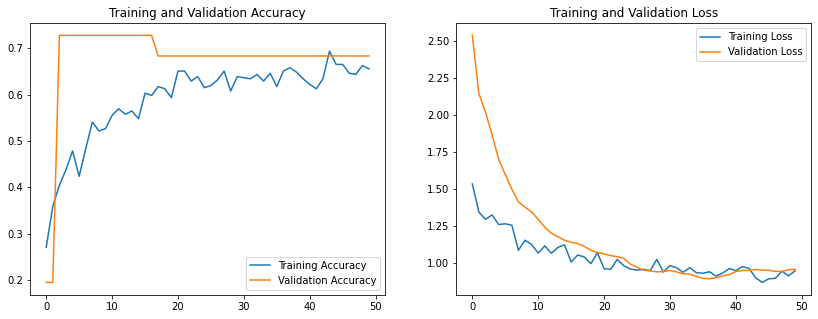

In [ ]:
# accuracy, loss 그래프

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
# Load the model from disk later using:
model.load_weights(checkpoint_filepath)

In [ ]:
y_pred_enc = model.predict(test_x)          # one-hot encoding된 label 예측값
y_pred = [np.argmax(i) for i in y_pred_enc] # label 예측값

10/10 [==============================] - 0s 2ms/step


In [ ]:
y_pred[:10]

[1, 1, 1, 1, 1, 1, 1, 0, 0, 1]

In [ ]:
y_pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,


## Submit

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
submit['Y_Class'] = y_pred

In [ ]:
submit.to_csv('./kfold_0218_dnn.csv', index=False)

# TabNet-B Classification

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassification


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train,test, train_y, train_w = split_x_y(train,test)

def fillna(x, y, z):
  x = x.fillna(z)
  y = y.fillna(z)
  return x, y

train, test = fillna(train,test,0)

In [ ]:
import torch
import torch.nn as nn
from pytorch_tabnet.tab_model import TabNetModel

class TabNetBClassifier(nn.Module):
    def __init__(self, num_features, num_classes):
        super(TabNetBClassifier, self).__init__()
        
        self.tabnet = TabNetModel(
            input_dim= ,
            output_dim= ,
            n_d= ,
            n_a= ,
            n_steps= ,
            gamma= ,
            lambda_sparse= ,
            momentum= ,
            clip_value= ,
            optimizer_fn=torch.optim. ,
            optimizer_params=dict(lr= ),
            mask_type=" ",
            scheduler_params=dict(
                mode=" ",
                patience= ,
                min_lr= ,
                factor= ,
                verbose=True
            )
        )

    def forward(self, x):
      
        return self.tabnet(x)

In [ ]:
model = TabNetBClassifier()

criterion = torch.nn.()

epochs = 

for epoch in range(epochs):
    for x, y in train_loader:
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        valid_loss = 0
        for x, y in valid_loader:
            output = model(x)
            loss = criterion(output, y)
            valid_loss += loss.item()
        valid_loss /= len(valid_loader)

    print(f"Epoch {epoch+1} loss: {valid_loss}")

# TabNet 예제

In [ ]:
# import library
!pip install pytorch_tabnet wget

from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
np.random.seed(0)
import os
import wget
from pathlib import Path
from matplotlib import pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=1150343627266cfa5f3df6d35b6435ffdcc224f97eb03297b444c0b13fb7fe33
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [ ]:
# download census-income dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
dataset_name = 'census-income'
out = Path(os.getcwd()+'/data/'+dataset_name+'.csv')
out.parent.mkdir(parents=True, exist_ok=True)
if out.exists():
    print("File already exists.")
else:
    print("Downloading file...")
    wget.download(url, out.as_posix())
    
# load data and split
col_name = ['age','workclass','fnlwgt','education','education-num', 'marital-status', 'occupation' ,
            'relationship','race','sex','capital-gain','capital-loss','hours-pier-week','native-country',
            '<=50K']
train = pd.read_csv(out, names = col_name)
target = '<=50K'
if "Set" not in train.columns:
    train["Set"] = np.random.choice(["train", "valid", "test"], p =[.8, .1, .1], size=(train.shape[0],))

train_indices = train[train.Set=="train"].index
valid_indices = train[train.Set=="valid"].index
test_indices = train[train.Set=="test"].index

In [ ]:
# simple preprocessing
nunique = train.nunique()
types = train.dtypes

categorical_columns = []
categorical_dims =  {}
for col in train.columns:
    if types[col] == 'object' or nunique[col] < 200:
        print(col, train[col].nunique())
        l_enc = LabelEncoder()
        train[col] = train[col].fillna("VV_likely")
        train[col] = l_enc.fit_transform(train[col].values)
        categorical_columns.append(col)
        categorical_dims[col] = len(l_enc.classes_)
    else:
        train.fillna(train.loc[train_indices, col].mean(), inplace=True)
        
# Define categorical feature for categorical embeddings
unused_feat = ['Set']
features = [ col for col in train.columns if col not in unused_feat+[target]] 
cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]
cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]
# define your embedding sizes : here just a random choice
cat_emb_dim = [5, 4, 3, 6, 2, 2, 1, 10]

# check that pipeline accepts strings
train.loc[train[target]==0, target] = "wealthy"
train.loc[train[target]==1, target] = "not_wealthy"

age 73
workclass 9
education 16
education-num 16
marital-status 7
occupation 15
relationship 6
race 5
sex 2
capital-gain 119
capital-loss 92
hours-pier-week 94
native-country 42
<=50K 2
Set 3


In [ ]:
# network parameters
tabnet_params = {"cat_idxs":cat_idxs,
                 "cat_dims":cat_dims,
                 "cat_emb_dim":1,
                 "optimizer_fn":torch.optim.Adam,
                 "optimizer_params":dict(lr=2e-2),
                 "scheduler_params":{"step_size":50, # how to use learning rate scheduler
                                 "gamma":0.9},
                 "scheduler_fn":torch.optim.lr_scheduler.StepLR,
                 "mask_type":'entmax',  # "sparsemax"
                 "gamma" : 1.3 # coefficient for feature reusage in the masks
                }

clf = TabNetClassifier(**tabnet_params)

In [ ]:
# training
X_train = train[features].values[train_indices]
y_train = train[target].values[train_indices]

X_valid = train[features].values[valid_indices]
y_valid = train[target].values[valid_indices]

X_test = train[features].values[test_indices]
y_test = train[target].values[test_indices]

max_epochs = 100 if not os.getenv("CI", False) else 2

# This illustrates the warm_start=False behaviour
save_history = []
for _ in range(2):
    clf.fit(
        X_train=X_train, y_train=y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        eval_name=['train', 'valid'],
        eval_metric=['auc'],
        max_epochs=max_epochs , patience=20,
        batch_size=1024, virtual_batch_size=128,
        num_workers=0,
        weights=1,
        drop_last=False
    )
    save_history.append(clf.history["valid_auc"])

epoch 0  | loss: 0.6528  | train_auc: 0.77082 | valid_auc: 0.75521 |  0:00:01s
epoch 1  | loss: 0.51162 | train_auc: 0.82775 | valid_auc: 0.81628 |  0:00:03s
epoch 2  | loss: 0.469   | train_auc: 0.85737 | valid_auc: 0.84884 |  0:00:05s
epoch 3  | loss: 0.4464  | train_auc: 0.87081 | valid_auc: 0.86053 |  0:00:07s
epoch 4  | loss: 0.43338 | train_auc: 0.87995 | valid_auc: 0.87141 |  0:00:10s
epoch 5  | loss: 0.41151 | train_auc: 0.88602 | valid_auc: 0.87445 |  0:00:14s
epoch 6  | loss: 0.40984 | train_auc: 0.89867 | valid_auc: 0.88948 |  0:00:16s
epoch 7  | loss: 0.38778 | train_auc: 0.90446 | valid_auc: 0.89492 |  0:00:18s
epoch 8  | loss: 0.38744 | train_auc: 0.91186 | valid_auc: 0.9018  |  0:00:20s
epoch 9  | loss: 0.37485 | train_auc: 0.91609 | valid_auc: 0.90721 |  0:00:22s
epoch 10 | loss: 0.36749 | train_auc: 0.91917 | valid_auc: 0.91118 |  0:00:25s
epoch 11 | loss: 0.35581 | train_auc: 0.92061 | valid_auc: 0.91261 |  0:00:28s
epoch 12 | loss: 0.35658 | train_auc: 0.92299 | vali

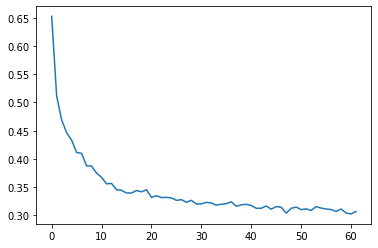

In [ ]:
# plot losses
plt.plot(clf.history['loss'])

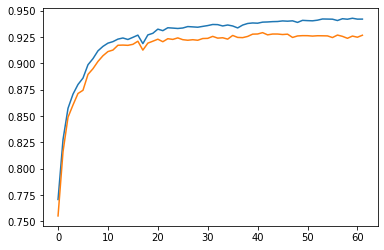

In [ ]:
# plot auc
plt.plot(clf.history['train_auc'])
plt.plot(clf.history['valid_auc'])

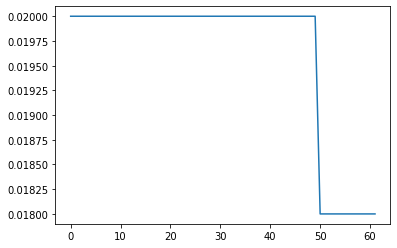

In [ ]:
# plot learning rates
plt.plot(clf.history['lr'])

In [ ]:
# prediction
preds = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test)


preds_valid = clf.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid[:,1], y_true=y_valid)

print(f"BEST VALID SCORE FOR {dataset_name} : {clf.best_cost}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

BEST VALID SCORE FOR census-income : 0.9291393453432859
FINAL TEST SCORE FOR census-income : 0.9218726477426693


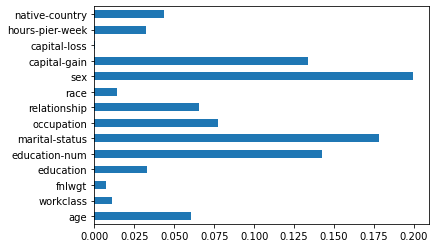

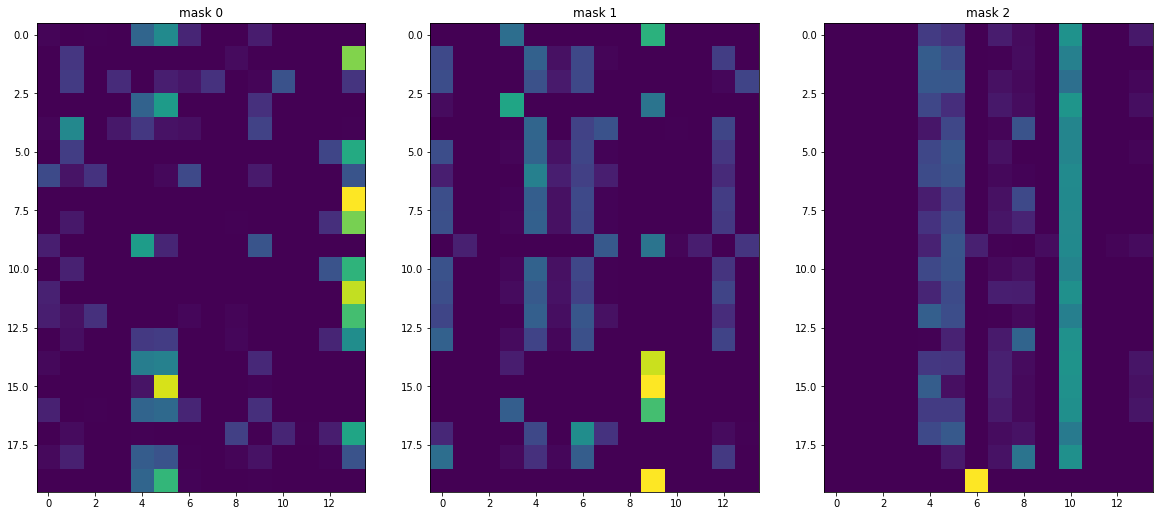

In [ ]:
# global
feat_importances = pd.Series(clf.feature_importances_, index=features)
feat_importances.plot(kind='barh')

#local
explain_matrix, masks = clf.explain(X_test)
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][30:50])
    axs[i].set_title(f"mask {i}")

- https://slowsteadystat.tistory.com/23

- https://only-wanna.tistory.com/entry/%EB%85%BC%EB%AC%B8-%EB%A6%AC%EB%B7%B0-TabNet-Attentive-Interpretable-Tabular-Learning-

# TabNet 예제 구현

In [ ]:
# simple preprocessing
nunique = train_x.nunique()
types = train_x.dtypes

In [ ]:
nunique

LINE             6
PRODUCT_CODE     3
X_1             10
X_2             16
X_3              1
                ..
X_2874           0
X_2875           0
Year             1
Month            4
Day             31
Length: 2880, dtype: int64

In [ ]:
train_x = train_x.fillna(train_x.mean())
train_x = train_x.fillna(0)  #nan으로 남아있는 것들 0으로 결측 처리
test_x = test_x.fillna(test_x.mean())
test_x = test_x.fillna(0)

In [ ]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [ ]:
features = [ col for col in train_x.columns]
cat_idxs = [ i for i, f in enumerate(features) if f in qual_col]
cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in qual_col]
# define your embedding sizes : here just a random choice
cat_emb_dim = [5, 4, 3, 6, 2, 2, 1, 10]


In [ ]:
tabnet_params = {"cat_idxs":cat_idxs,
                 "cat_dims":cat_dims,
                 "cat_emb_dim":1,
                 "optimizer_fn":torch.optim.Adam,
                 "optimizer_params":dict(lr=2e-2),
                 "scheduler_params":{"step_size":50, # how to use learning rate scheduler
                                 "gamma":0.9},
                 "scheduler_fn":torch.optim.lr_scheduler.StepLR,
                 "mask_type":'entmax', # "sparsemax"
                 "gamma" : 1.3 # coefficient for feature reusage in the masks
                }

clf = TabNetClassifier(**tabnet_params)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=2023, shuffle=True, stratify='Y')

In [ ]:
X_train = train[features].values[train_indices]
y_train = train[target].values[train_indices]

X_valid = train[features].values[valid_indices]
y_valid = train[target].values[valid_indices]

X_test = train[features].values[test_indices]
y_test = train[target].values[test_indices]

max_epochs = 100 if not os.getenv("CI", False) else 2

# This illustrates the warm_start=False behaviour
save_history = []
for _ in range(2):
    clf.fit(
        X_train=X_train, y_train=y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        eval_name=['train', 'valid'],
        eval_metric=['auc'],
        max_epochs=max_epochs , patience=20,
        batch_size=1024, virtual_batch_size=128,
        num_workers=0,
        weights=1,
        drop_last=False
    )
    save_history.append(clf.history["valid_auc"])